<a href="https://colab.research.google.com/github/saqlainshabbir/modelsin-machine-learning/blob/main/Simple%20Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [17]:
%%writefile content.json
{"intents":
  [
    {
      "tag":"greeting",
      "input":["hello","hi there","nice to meet you","hi, is this is the pirate's organization","any pirates here ?","hi","hey there","hey","hi"],
      "responses":[
        "Hi, Welcome to the world's largest pirate organization - The Strawhats",
        "Hey yo, do you need help ?",
        "Welcome aboard, how may I help you ?",
        "ahoy!!",
        "Hi random person, what do you want ?",
        "Hello  my friend, How can I help you ?",
        "Ha, Glad you showed up. How are you ?"
      ]
    },
    {
      "tag":"howami",
      "input":["How are you ?","I am fine, how are you ?","Are you fine ?","How are things going on","everything going on okay"],
      "responses":[
        "Yeah, I am fine",
        "Everything's going on well",
        "Doing good. Thanks you are my best friend",
        "Things are Great",
        "Yeah Fine, nothing much going on in my life",
        "I am Great, wanna join the pirate's organization ?",
        "Everything's great",
        "I am doing good. Life is boring. need to go on an adventure"
      ]
    },
    {
      "tag":"whoareyou",
      "input":["Who are you ?","What are you ?","What is your name","Are you a chatbot ?","What can I call you","Your name ?","Are you a bot ?"],
      "responses":[
        "I am a The Great Pirate Bot, you can call me Going Merry",
        "I am Going Merry and you could ask me questions about our organization",
        "Going Merry at your service",
        "My name is Going Merry and yes, I am G.O.A.T",
        "You can call me TechBot and I am here to help you",
        "My name is Going Merry and I am here to answer your questions regarding our organization. Go ahead and shoot"
      ]
    },
    {
      "tag":"whereareyou",
     "input":["Where are you from ?","Which country are you from ?","Where are you ?","Where do you live in ?"],
     "responses":[
      "I Live in the Pakistan",
      "I am setting sail to the grand line",
      "I live in Pakistan. Pretty sure you wouldn't have heard about that",
      "Pakistan. That's where I live"
      ]
    },
    {
     "tag":"join",
      "input":["How to get recruited ?","How to join ?","How do I get recruited ?","How to join the Strawhats ?","How do I join the Straw hats ?"],
      "responses":[
        "You need to contact the nearest Straw hats center once you have completed the pre-requisites",
        "Contact the closest Straw hat center from your location",
        "Well. There are some pre-requisite and after you complete them, find the Straw hat centers"
     ]
    },
    {
      "tag":"whereisthecenter",
      "input":["Where is the straw hat center located ?","Location of the straw ha center ?","Strawhat center's location ?"],
      "responses":[
        "That's up to you. Use your skills",
        "They are present all over the city you live in. Find them on your own. I can't give any more information",
        "There are a lot of straw hat centers in the city you are in. Find them."
      ]
    },
    {
      "tag":"prerequisites",
      "input":["What are the job requriements ?","What are the pre requisites ?","Tell me about the pre-requisites"],
      "responses":[
        "You gotta master the art of swordfight or master Cooking and become a furious cook or you have to be the best navigator in the entire world",
        "Swordsman, a medical reindeer, taekwando Cook, master Navigator, simple minded monkey, highly intelligent strategist, god usop."
      ]
    },
    {
      "tag":"goodbye",
      "input":["Thank you", "Thanks","Thanks for the information","bye","bye bro","adios","okay bye","goodbye","see you later","I will catch you later"],
      "responses":[
        "Okay, Bye",
        "Have a nice day",
        "Adios",
        "Goodbye",
        "See you later",
        "Nice conversation bye",
        "Okay, Have a nice day",
        "Take care",
        "We'll meet you",
        "Yeah Sure, Will talk to you later",
        "Okay, Take care"
      ]
    }
  ]
}

Overwriting content.json


In [18]:
# Importing the dataset
import json

with open('content.json') as content:
    data = json.load(content)

In [19]:
# Importing the dataset
import json
import pandas as pd
with open('content.json') as content:
    data = json.load(content)
# getting all the data in lists
tags = []
inputs = []
responses = {}
for intent in data['intents']:
    responses[intent['tag']] = intent['responses']
    for line in intent['input']:  # Corrected key 'input' here
        inputs.append(line)
        tags.append(intent['tag'])
# converting to datafram
data = pd.DataFrame({"inputs": inputs, "tags": tags})
#printing the data
data

,inputs,tags
0,hello,greeting
1,hi there,greeting
2,nice to meet you,greeting
3,"hi, is this is the pirate's organization",greeting
4,any pirates here ?,greeting
5,hi,greeting
6,hey there,greeting
7,hey,greeting
8,hi,greeting
9,How are you ?,howami


In [20]:
from typing import Sequence
# Tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
# Applying padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)
# Encoding the output
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [21]:
input_shape = x_train.shape[1]
print(input_shape)

7


In [22]:
# define vocabluary
vocabulary=len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length=le.classes_.shape[0]
print("output_length : ",output_length)

number of unique words :  75
output_length :  8


In [23]:
# creating the model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
# Define input_shape
input_shape = x_train.shape[1]  # This is the length of your padded sequences
# Creating the model
i = Input(shape=(input_shape,))
x = Embedding(vocabulary + 1, 10)(i)
x = LSTM(10, return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length, activation="softmax")(x)
model = Model(i, x)

In [24]:
# Compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 7)]               0         
                                                                 
 embedding_1 (Embedding)     (None, 7, 10)             760       
                                                                 
 lstm_1 (LSTM)               (None, 7, 10)             840       
                                                                 
 flatten_1 (Flatten)         (None, 70)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 568       
                                                                 
Total params: 2168 (8.47 KB)
Trainable params: 2168 (8.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# Training the model
train = model.fit(x_train,y_train, epochs=200)

Epoch 1/200
2/2 [==============================] - 2s 12ms/step - loss: 2.0816 - accuracy: 0.1522
Epoch 2/200
2/2 [==============================] - 0s 16ms/step - loss: 2.0782 - accuracy: 0.1522
Epoch 3/200
2/2 [==============================] - 0s 11ms/step - loss: 2.0753 - accuracy: 0.1304
Epoch 4/200
2/2 [==============================] - 0s 11ms/step - loss: 2.0726 - accuracy: 0.1957
Epoch 5/200
2/2 [==============================] - 0s 11ms/step - loss: 2.0697 - accuracy: 0.2391
Epoch 6/200
2/2 [==============================] - 0s 11ms/step - loss: 2.0671 - accuracy: 0.2609
Epoch 7/200
2/2 [==============================] - 0s 11ms/step - loss: 2.0642 - accuracy: 0.2174
Epoch 8/200
2/2 [==============================] - 0s 12ms/step - loss: 2.0614 - accuracy: 0.2174
Epoch 9/200
2/2 [==============================] - 0s 11ms/step - loss: 2.0583 - accuracy: 0.2174
Epoch 10/200
2/2 [==============================] - 0s 11ms/step - loss: 2.0558 - accuracy: 0.2174
Epoch 11/200
2/2 [=

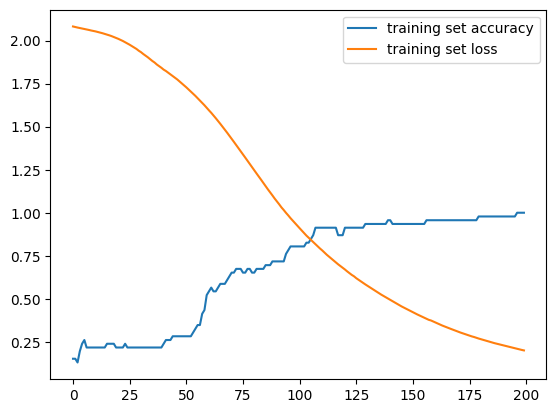

In [26]:
# Ploting model accuracy
import matplotlib.pyplot as plt
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [27]:
import random
import string
import numpy as np

while True:
    texts_p = []
    prediction_input = input('You: ')
    # Removing punctuation and converting to lowercase
    prediction_input = [letter.lower() for letter in prediction_input if letter not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_p.append(prediction_input)
    # Tokenizing and padding
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input], maxlen=input_shape)
    # Getting output from the model
    output = model.predict(prediction_input)
    output = output.argmax()
    # Finding the right tag and predicting
    response_tags = le.inverse_transform([output])
    # Accessing all elements of the response_tags list
    for response_tag in response_tags:
        print(random.choice(responses[response_tag]))
    if response_tag == "goodbye":
        break

You: Hi, is this is the Pirate's organization
1/1 [==============================] - 0s 412ms/step
Welcome aboard, how may I help you ?
You: How are you ?
1/1 [==============================] - 0s 21ms/step
Everything's going on well
You: Are you a chatbot?
1/1 [==============================] - 0s 23ms/step
I am a The Great Pirate Bot, you can call me Going Merry
You: Where do you live in ?
1/1 [==============================] - 0s 34ms/step
I live in Pakistan. Pretty sure you wouldn't have heard about that
You: How to join ?
1/1 [==============================] - 0s 22ms/step
You need to contact the nearest Straw hats center once you have completed the pre-requisites
You: Location of the straw hat center ?
1/1 [==============================] - 0s 20ms/step
There are a lot of straw hat centers in the city you are in. Find them.
You: Tell me about the pre-requisites
1/1 [==============================] - 0s 22ms/step
I am Going Merry and you could ask me questions about our organizati